## Data Cleaning & Exploration

#### Simulating Data sets

In [11]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Simulate data
n_patients = 50000

# Patient demographics
patient_ids = np.arange(1, n_patients + 1)
genders = np.random.choice(['Male', 'Female'], size=n_patients)
treatments = np.random.choice(['A', 'B'], size=n_patients)

# Simulated values
recovery_days = np.random.normal(loc=9.5, scale=2.0, size=n_patients).round(1)  # Around national avg 10 days
pain_scores_after = np.clip(np.random.normal(loc=4.8, scale=1.2, size=n_patients), 1, 10).round(1)
satisfaction_scores = np.random.randint(6, 11, size=n_patients)  # Score from 6 to 10

# Vitals before and after (e.g., blood pressure systolic)
vitals_before = np.random.normal(loc=140, scale=10, size=n_patients).round(1)
vitals_after = vitals_before - np.random.normal(loc=10, scale=5, size=n_patients).round(1)

# Create DataFrame
df = pd.DataFrame({
    'Patient_ID': patient_ids,
    'Gender': genders,
    'Treatment_Type': treatments,
    'Recovery_Days': recovery_days,
    'Pain_Score_After': pain_scores_after,
    'Satisfaction_Score': satisfaction_scores,
    'Vitals_Before': vitals_before,
    'Vitals_After': vitals_after
})

df.head()



,Patient_ID,Gender,Treatment_Type,Recovery_Days,Pain_Score_After,Satisfaction_Score,Vitals_Before,Vitals_After
0,1,Male,B,9.5,4.7,8,148.0,140.2
1,2,Female,B,11.9,6.6,6,130.9,122.0
2,3,Male,B,10.8,2.9,10,141.9,129.7
3,4,Male,A,7.9,5.0,9,127.1,123.8
4,5,Male,A,13.1,3.7,6,143.6,134.5


#### Getting Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          50000 non-null  int32  
 1   Gender              50000 non-null  object 
 2   Treatment_Type      50000 non-null  object 
 3   Recovery_Days       50000 non-null  float64
 4   Pain_Score_After    50000 non-null  float64
 5   Satisfaction_Score  50000 non-null  int32  
 6   Vitals_Before       50000 non-null  float64
 7   Vitals_After        50000 non-null  float64
dtypes: float64(4), int32(2), object(2)
memory usage: 2.7+ MB


In [15]:
df.isnull().sum()


Patient_ID            0
Gender                0
Treatment_Type        0
Recovery_Days         0
Pain_Score_After      0
Satisfaction_Score    0
Vitals_Before         0
Vitals_After          0
dtype: int64

#### Inserting Missing Value

In [17]:
# Define fraction of missing data per column
missing_fractions = {
    'Recovery_Days': 0.03,         # 3% missing
    'Pain_Score_After': 0.07,      # 7% missing
    'Satisfaction_Score': 0.20,    # 20% missing
    'Vitals_Before': 0.05,         # 5% missing
    'Vitals_After': 0.05           # 5% missing
}

# Insert NaNs based on different missing rates
for col, frac in missing_fractions.items():
    missing_indices = df.sample(frac=frac, random_state=42).index
    df.loc[missing_indices, col] = np.nan


In [21]:
df.to_csv('raw_hospital_dataset1.csv')

#### Diplaying Missing Value

In [23]:
df.isnull().sum()

Patient_ID                0
Gender                    0
Treatment_Type            0
Recovery_Days          1500
Pain_Score_After       3500
Satisfaction_Score    10000
Vitals_Before          2500
Vitals_After           2500
dtype: int64

#### Calculating Missing Value Percents

Though we already know the missing value percents, Checking missing value percentage is good practice for real world data sets.

In [25]:
missing_count = df.isnull().sum()
total_rows = len(df)
missing_percentage = (missing_count / total_rows) * 100
print("Missing Percentage:", [round(i, 2) for i in missing_percentage])

Missing Percentage: [0.0, 0.0, 0.0, 3.0, 7.0, 20.0, 5.0, 5.0]


#### Data Clean and Handling Missibg Value

Apply Rubin's missing data theory:
- <5% missing: Minimal concern.
- 5–20% missing: Requires careful analysis.
- 20–30% missing: Serious concern.
- 50% missing: Often unacceptable.

Reference: Jakobsen et al. (2017) - Guidelines for handling missing data.

Since the 'Recovery_Days', 'Vitals_Before', and 'Vitals_After' columns have 5% or fewer missing values, the impact is minimal. Therefore, we can safely apply .dropna() on these columns to remove the corresponding rows without significantly affecting the dataset.

In [27]:
df = df.dropna(subset=['Recovery_Days','Vitals_Before','Vitals_After'])
df.isnull().sum()

Patient_ID               0
Gender                   0
Treatment_Type           0
Recovery_Days            0
Pain_Score_After      1000
Satisfaction_Score    7500
Vitals_Before            0
Vitals_After             0
dtype: int64

In [29]:
#To maintain Data integrity 
df2=df.copy()

In [31]:
#again calculating missing percentage for remaining value 
remaining_cols=['Pain_Score_After','Satisfaction_Score']
missing_count = df2[remaining_cols].isnull().sum()
total_rows = len(df2)
missing_percentage = (missing_count / total_rows) * 100
print("Missing Percentage:", [round(i, 2) for i in missing_percentage])

Missing Percentage: [2.11, 15.79]


In [33]:
#apply dropna() for col 'Pain_Score_After' 
df2 = df2.dropna(subset=['Pain_Score_After'])
df2.isnull().sum()

Patient_ID               0
Gender                   0
Treatment_Type           0
Recovery_Days            0
Pain_Score_After         0
Satisfaction_Score    6500
Vitals_Before            0
Vitals_After             0
dtype: int64

In [35]:
#again calculating missing percentage for remaining value 
missing_count = df2['Satisfaction_Score'].isnull().sum()
total_rows = len(df2)
missing_percentage = (missing_count / total_rows) * 100
print(f"Missing Percentage:{missing_percentage:.2f}")

Missing Percentage:13.98


In [37]:
print("Skewness (Satisfaction_Score):",df2['Satisfaction_Score'].skew())


Skewness (Satisfaction_Score): -0.00408365148476007


#### thumb of rule
- If skew() > 1 or < -1 = Highly skewed = Median
- If skew() ≈ 0 = Normal = Mean

In [49]:
df2.fillna(df2['Satisfaction_Score'].mean())
df2.isnull().sum()

Patient_ID               0
Gender                   0
Treatment_Type           0
Recovery_Days            0
Pain_Score_After         0
Satisfaction_Score    6500
Vitals_Before            0
Vitals_After             0
dtype: int64

In [41]:
print(df2.columns)

Index(['Patient_ID', 'Gender', 'Treatment_Type', 'Recovery_Days',
       'Pain_Score_After', 'Satisfaction_Score', 'Vitals_Before',
       'Vitals_After'],
      dtype='object')


In [53]:
#replacing nan value with mean value of column
mean_value = df2['Satisfaction_Score'].mean()
df2 = df2.fillna(value=mean_value)
df2.isnull().sum()


Patient_ID            0
Gender                0
Treatment_Type        0
Recovery_Days         0
Pain_Score_After      0
Satisfaction_Score    0
Vitals_Before         0
Vitals_After          0
dtype: int64

#### Test Normality of Each Columns

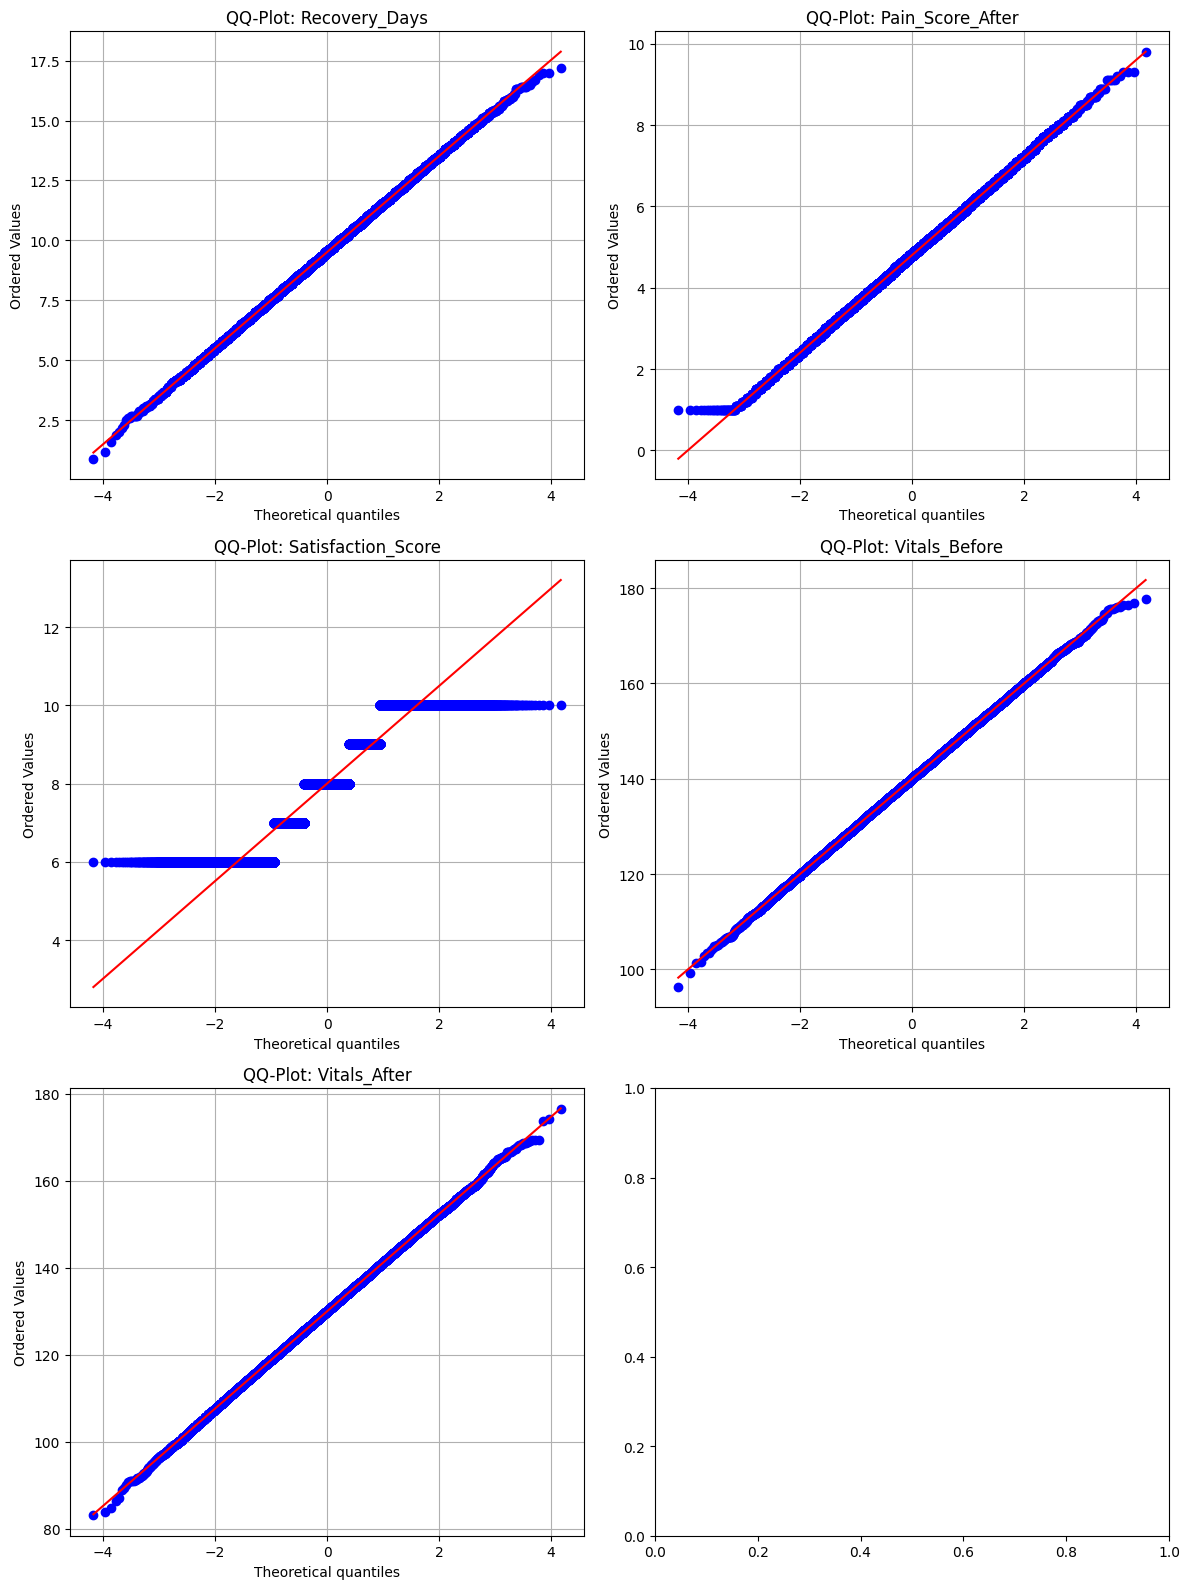

In [55]:
import matplotlib.pyplot as plt
from scipy import stats

# List of columns to check for normality
columns_to_plot = ['Recovery_Days','Pain_Score_After','Satisfaction_Score','Vitals_Before','Vitals_After']

# Create the 4x2 subplots
fig, axes_array = plt.subplots(3, 2, figsize=(12, 16))

# Flatten axes to use as a 1D list
axes = axes_array.flatten()

# Generate QQ-plots
for i, col in enumerate(columns_to_plot):
    stats.probplot(df2[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ-Plot: {col}")
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('QQ_plot_Checking_Normality.png')
plt.show()


In [57]:
print("Skewness (Satisfaction_Score):",df2['Satisfaction_Score'].skew())

Skewness (Satisfaction_Score): -0.00440294108899291


The QQ plot of the Satisfaction_Score column shows noticeable deviations from the straight line because the data is bounded (6 to 11), discrete, and represents ordinal ratings, not continuous values. Despite its near-zero skewness, the distribution violates normality assumptions due to these structural constraints, not asymmetry.

#### Saving Cleaned Datasets

In [61]:
df2.to_csv('hospital_dataset.csv',index=False)